### Qiskit Coding Lecture 2nd, 2023 1학기 연세대학교 PHY5051-01 
- 
Date and time: 230504, 10am to 1pm KST
- 
[Lecture Syllabus](https://learn.qiskit.org/syllabus/IJN-K0N)

## 수업 중간중간 사용할 퀴즈 플랫폼 로그인

오늘도 마찬가지로 퀴즈쇼를 진행해 봅시다! 오늘은 총 15개의 문제가 준비되어 있습니다.

<h3>모두 로그인해주세요!</h3>

수업을 모두 마친후 최상위 5인에게는 종강전에 특별 상품을 보내드립니다! 기대하세요! (지난번 상품은 무엇이엇을까요?)

https://ahaslides.com/FXWV2

<img src="img/quiz.png" alt="Alternative text" width=800/>

## Grover’s Algorithm

[Qiskit Textbook Link](https://learn.qiskit.org/course/v2_ch-algorithms/grovers-algorithm)

Qiskit과 함께 하는 코딩 수업 두번째에 오신 여러분을 환영합니다! 이번 시간에는 총 세가지 양자 알고리듬(Deutsch-Jozsa algorithm, Shor's algorithm, Grover's algorithm) 에 대한 실습과 함께, 코딩 실습과 퀴즈 쇼를 함께 진행해 보겠습니다. 

두번째로, Grover's algorithm 알고리듬을 알아보도록 합시다.

여러분은 한번 쯤 양자 컴퓨터가 고전적인 컴퓨터에 비해 가지고 있는 많은 장점 중 하나가 데이터베이스를 검색하는 속도가 빠르다는 것이라고 들어보았을 것입니다. Grover 알고리듬이 바로 이 문제에 대한 양자적 이득을 얻는 방법을 소개해 줍니다. 기본적인 원리는 앞서 실습한 Deutsch-Jozsa 알고리듬과 같이 양자병렬성과 Phase Kickback이지만, 이 문제에서는 한가지 더, Amplitude amplification을 사용합니다.

### IBM Quantum Challenge

여러분 IBM Quantum Challenge에 대해서 들어보셨나요? IBM Quantum은 1년에 두 번 - 봄(5월)과 가을(11월) - 에 각각 두번의 글로벌 양자컴퓨팅 챌린지를 개최합니다. 그중 가을 챌린지는 저희! Qiskit APAC팀이 주관합니다. 

다음 이미지는 지난해 가을 퀀텀 챌린지 - 블랙홀 탈출 - 의 [결과 블로그](https://research.ibm.com/blog/quantum-challenge-fall-2022-results)에서 가져온 마지막 문제 - 행성 쓰레기를 수집하기 위한 최적 경로에서 가져온 이미지입니다. 
<img src="https://dwzke5c1hcizv.cloudfront.net/image?url=https%3A%2F%2Fresearch-website-prod-cms-uploads.s3.us.cloud-object-storage.appdomain.cloud%2FQuantum_Challenge_2022_Results_leadspace_2520x1418_6d733f18b5.png&w=2048&q=85" alt="Alternative text" width=800/>

퀀텀 챌린지는 참가자들에게
1. 초급부터 고급까지 양자컴퓨팅의 배움의 기회 제공 및 성과에 따라 Badge 제공
2. Qiskit 사용법 제공 및 도전 과제를 통한 실습의 기회 제공
3. 챌린지 기간 동안 Real 백엔드 억세스를 제공
4. 한국어,일본어,스페인어 버젼 챌린지 노트북 제공

하고 있습니다. 올해 봄 챌린지는 5월 14일부터 27일까지 진행되며 `양자회로 중간에서 큐비트를 초기화 하거나 측정할 수 있는 Dynamic Circuit`을 배우고, 연습하고, 응용하고, 도전하는 기회가 될 것입니다. 공식 공지는 이곳에서 확인할 수 있습니다.

Grover 알고리듬에 대한 설명과 실습은 2020년 가을의 IBM Quantum 챌린지의 컨텐츠를 사용하도록 하겠습니다.

###  그로버의 알고리즘

고전 컴퓨터를 능가하는 양자 컴퓨터의 수 많은 가능성 중 하나로 빠른 속도로 데이터베이스를 검색하는 능력이 포함 된 다는것을 들어 본 적이 있나요?<br/>
그로버 알고리즘은 이 능력을 구현하는 알고리즘 입니다.  이 알고리즘은 검색을 2차 오더로 고속화(고전 알고리즘은 $N$ 번을 계산해야 하는 문제가 양자 컴퓨터로는 $\sqrt{N}$ 번만으로 구현 됨)할 수 있습니다, 하지만 단순히 검색에만 이용되는 것은 아닙니다; 2차 오더의 성능 개선이 필요한 다양한 알고리즘에 서브루틴이나 일반적인 용도로 사용될 수도 있습니다. 그로버 알고리즘은 일반적으로 진폭 증폭 기술로 불립니다. 

이 페이지에서는 검색 문제와 해당 알고리즘을 자세히 설명하고, 검색 문제용 오라클(Oracle)을 회로로 작성한 후 그로버의 알고리즘을 Qiskit을 이용하여 구현합니다. 

<img src='https://learn.qiskit.org/content/v2/ch-algorithms/images/grover_steps.png' alt="Alternative text" width=800/>


#### 비정형 데이터 검색

$N$개의 데이터 목록이 제공된다고 가정합니다. 이 데이터들 중에서 우리가 찾고자 하는 독특한 특성을 가진 데이터가 하나 있습니다. 우리는 이것을 우승자 ${w}$ 라고 합시다. 목록에 있는 각 데이터를 박스안에 담겨있는 것으로 상상해 봅시다. 목록의 데이터는 우승자를 제외하고는 모두 회색 계열로 설정합시다. 

<img src='img/unstructured_search.png' alt="Alternative text" width=800/>

우승자 -- 마크가 표시된 아이템 -- 를 찾기 위해서는 고전 계산에서는 평균 $N/2$개의 상자를 열어봐야 합니다.
최악의 경우, $N$ 개를 열어봐야합니다. 하지만 양자컴퓨터에서는 Grover의 진폭증폭 테크닉을 사용해서
대략 $\sqrt N$ 스텝에서 표시된 아이템을 찾을 수 있습니다.
2차 고속화는 큰 목록 내의 표시된 아이템을 찾기 위해서는 실제로는 많은 시간을 절약하게 해줍니다.
이 알고리즘은 목록 자체의 내부구조를 이용하지 않아 일반화될 수 있고 많은 고전의 문제에서도 2차 속도향상을 가져올 수 있습니다.

#### Step 0: 
상태의 준비는 입력에 대한 균일한 중첩 상태 $|s\rangle$부터 시작합니다.균일한 중첩 상태는 $|s\rangle= H^{\otimes n}|0\rangle^{n}$로 쉽게 생성할 수 있습니다.$t=0$일 때 초기 상태는 $|\psi_{0}\rangle=|s\rangle$입니다. 여기에서 새로운 상태 $|s^{'}\rangle$를 소개합니다. $|s^{'}\rangle$는 $|w\rangle$와 수직이며, $|s\rangle$에서 $|w\rangle$를 제거하고 amplitude를 normalize해서 만듭니다. 

<img src='https://learn.qiskit.org/content/v2/ch-algorithms/images/grover_step1.jpg' alt="Alternative text" width=800/>

$|s\rangle$는 이 두 상태의 조합으로 만들수 있으며, 
$$|s\rangle = sin(\theta)|w\rangle + cos(\theta)|s^{'}\rangle$$
을 만족하며 이때 $\theta = arcsin\langle s|w\rangle = arcsin(\frac{1}{\sqrt{N}})$을 만족합니다. 오른쪽의 그래프는 $|s\rangle$의 Amplitude를 보여줍니다.

이 과정은 다음과 같이 이해할 수 있습니다. Deutsch-Jozsa 문제와 마찬가지로 보조 교재를 참고하였습니다. [Thomas Wong - Introduction to classical and quantum computing](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e3p.pdf)


$$ |s\rangle = \frac{1}{\sqrt{N}}(|w\rangle + \sum_{i \neq w}|i\rangle) \text{ number of  } |i\rangle = N-1 $$
$$ |s\rangle = \frac{1}{\sqrt{N}}|w\rangle + \frac{\sqrt{N-1}}{\sqrt{N}}\frac{1}{\sqrt{N - 1}}(\sum_{i \neq w}|i\rangle), \text{이때, } \frac{1}{\sqrt{N - 1}}(\sum_{i \neq w}|i\rangle) = |r\rangle \text{라 하면}$$
$$|s\rangle = \frac{1}{\sqrt{N}}|w\rangle + \frac{\sqrt{N-1}}{\sqrt{N}}|r\rangle = sin(\theta)|w\rangle + cos(\theta)|r\rangle$$

### Step 2: Oracle

우승 상태의 위상을 반전시키는 오라클 $U_{f}$를 $|s\rangle$에 적용합니다 $U_{f}|s\rangle= (-1)sin(\theta)|w\rangle + cos(\theta)|r\rangle $

<img src='img/step1.png' alt="Alternative text" width=800/>

보통 이 오라클을 Reflection 오라클이라\ 부르며, $|s\rangle$를 $|r\rangle$을 기준으로 대칭이동 한것과 같습니다. 이 오라클은 다른 형태로
$$U_f = I - 2|w\rangle\langle w |$$
라 쓸수 있으며, 
$$ U_f|w\rangle = |w\rangle - 2|w\rangle\langle w|w\rangle = -|w\rangle$$
가 되어 $U_f|s\rangle = |s\rangle - \frac{2}{\sqrt{N}}|w\rangle = -\frac{1}{\sqrt{N}}|w\rangle + \frac{\sqrt{N-1}}{\sqrt{N}}|r\rangle$로 쓸 수 있습니다. 

### Step 3: Diffusion

이제, Diffusion 연산 $U_s$를 $U_f|s\rangle$에 적용합니다. $U_s$는 대상을 $|s\rangle$에 대하여 대칭이동 하는 것과 같으며, $2|s\rangle\langle s|- I$와 같습니다.

<img src='img/step2.png' alt="Alternative text" width=800/>

이 과정을 자세히 살펴봅시다.

$$U_s(U_f|s\rangle) = (2|s\rangle\langle s|- I)(|s\rangle - \frac{2}{\sqrt{N}}|w\rangle)$$
$$= 2|s\rangle\langle s | s\rangle - |s\rangle - \frac{4}{\sqrt{N}}|s\rangle\langle s |w\rangle + \frac{2}{\sqrt{N}}|w\rangle, \text{이 때, } \langle s |w\rangle = \frac{1}{\sqrt{N}} \text{ 이므로}$$
$$ = \frac{N-4}{N}|s\rangle + \frac{2}{\sqrt{N}}|w\rangle$$


### Reflection - Diffusion 반복

정답을 얻을 확률을 끌어올리기 위해서, 일반적으로 $U_sU_f$를 t번 반복하게 됩니다. 위의 식에서 볼 수 있듯이 1번의 과정마다, $2\theta$만큼씩 $|w\rangle$ 상태에 가까워지므로, 
$$\frac{\pi}{2} = \theta + (2\theta)t$$
$$\therefore t = \frac{\pi}{4\theta} - \frac{1}{2}$$

$N$이 크다면, $\theta \approx sin^{-1}(\frac{1}{\sqrt{N}}) \approx \frac{1}{\sqrt{N}}$ 이므로
$$t \approx \frac{\pi}{4}\sqrt{N} - \frac{1}{2} \approx \frac{\pi}{4}\sqrt{N}$$

만약 Winner 상태가 1개가 아니라 M개라면, $\theta \approx sin^{-1}\sqrt{\frac{M}{N}} \approx \sqrt{\frac{M}{N}}$이 되어,
$$t \approx \frac{\pi}{4}\sqrt{\frac{N}{M}} - \frac{1}{2} \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}$$

회의 Reflection-Diffusion의 반복을 필요로 하게 된다.

<div class="alert alert-block alert-info"> <b>Quiz Time</b> 그루버 알고리즘에 대한 다음의 질문에 답하시오. 총 두 문제 (제한시간 각 30초, 60초) </div>

## Grover Step by Step - use phase kick-back version

### State preparation

Phase Kick-back을 사용하는 Grover Algorithm의 경우 Deutsch-Jozsa와 마찬가지로, $|-\rangle$상태로 준비되는 추가적인 큐비트가 필요합니다.

아래에서 Winning state가 `10`인 2큐비트 Grover algorithm을 작성해 봅시다.

In [91]:
import numpy as np

from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map, plot_bloch_multivector, plot_state_qsphere
from qiskit.visualization.array import array_to_latex
from qiskit.quantum_info import hellinger_fidelity, random_statevector, Statevector, Operator,QuantumState


from qiskit_ibm_provider import IBMProvider

from qiskit_aer import AerSimulator, QasmSimulator, StatevectorSimulator


# Plotting tools
import matplotlib.pyplot as plt
from IPython.display import IFrame

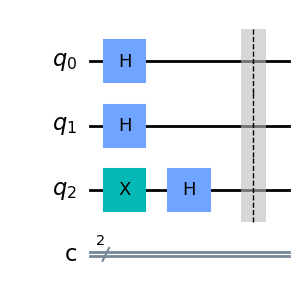

In [59]:
qc=QuantumCircuit(3,2)
qc.h([0,1])
qc.h(range(2))
qc.x(2)
qc.h(2)
qc.barrier([0,1,2])
qc.draw('mpl')

### Oracle 

이제 Q0, Q1에 Winning State에 -를 부여하는 Oracle회로를 작성합니다.

$$U_f = I - 2|w\rangle\langle w |$$

이므로, 이를 회로로 구현하기 위해서 먼저, $A|0\rangle = |w\rangle$인 $A$ 유니터리를 생각해 보자. $|w\rangle = A|0\rangle$로 바꾸면,
$$AA^{\dagger} - 2A|0\rangle \langle 0 | A^{\dagger}$$

로 쓸수 있으므로 이 회로는 

$$A(I - |0\rangle\langle 0|)A^{\dagger}$$

의 형태로 작성될 수 있습니다. 이때 가운데 부분, $2|00\rangle\langle 00| - I$을 조금 자세히 살펴 보면,

$$\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1 \end{bmatrix} + \begin{bmatrix}-2 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1 \end{bmatrix} = 
\begin{bmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1 \end{bmatrix}$$

00에 - 값을 입히는 회로와 동등하므로 다음과 같이 회로를 구성할 수 있습니다.

In [3]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

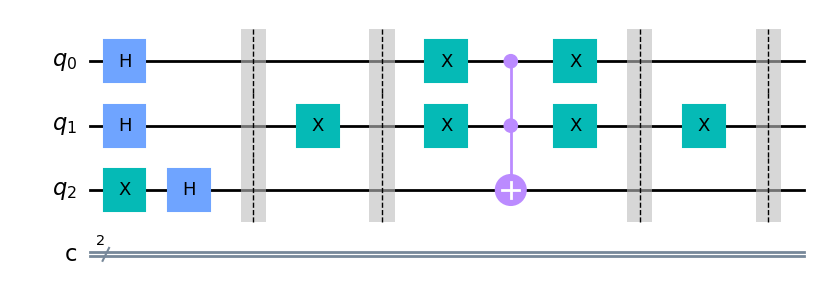

In [60]:
# solution

#A
qc.x(1)
qc.barrier([0,1,2])
#I - 2|0><0|
qc.x([0,1])
qc.ccx(0,1,2)
qc.x([0,1])
qc.barrier([0,1,2])
#A_dagger
qc.x(1)
qc.barrier([0,1,2])
qc.draw('mpl')

### Diffuser

Diffuser회로는 일반적으로 다음과 같이 구성됩니다.


<img src='https://learn.qiskit.org/content/v2/ch-algorithms/images/grover_diff.png' alt="Alternative text" width=800/>


우선 Diffuser회로가 $|s\rangle$상태에 대한 reflection, 즉,$|s_{\perp}\rangle$상태에 -위상을 주는 것임을 기억합시다. 또한 $|s\rangle$ 상태가 모든 상태의 중첩, 즉 $H^{\otimes n}|0\rangle$을 기억합시다. 

$|s\rangle$상태를 $|0\rangle$로 변환시키면, Diffuser의 설계가 쉬워집니다. 즉,  $H^{\otimes n}|s\rangle = |0\rangle$인 성질을 이용하여 Diffuser 회로의 입력을 모두 Computational Basis로 변환 시켜 사용할 수 있습니다.

즉 Diffuser 회로는 
$$H\otimes H (2|00\rangle\langle 00|)H\otimes H - H\otimes H \cdot H\otimes H)$$
$$ = H\otimes H (2|00\rangle\langle 00| - I )H\otimes H)$$

의 형태로 작성될 수 있습니다. 이때 가운데 부분, $2|00\rangle\langle 00| - I$을 조금 자세히 살펴 보면,

$$2\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0  \\ 0 & 0 & 0 & 0  \\ 0 & 0 & 0 & 0 \end{bmatrix} - \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1\end{bmatrix} = - \begin{bmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1\end{bmatrix}$$ 

이제, 0이 아닌, 즉 이 문제에서 처럼 2비트 문제인 경우 $|00\rangle$이 아닌 모든 상태에 `-`값을 인코딩 하는 회로를 작성합니다.

In [61]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

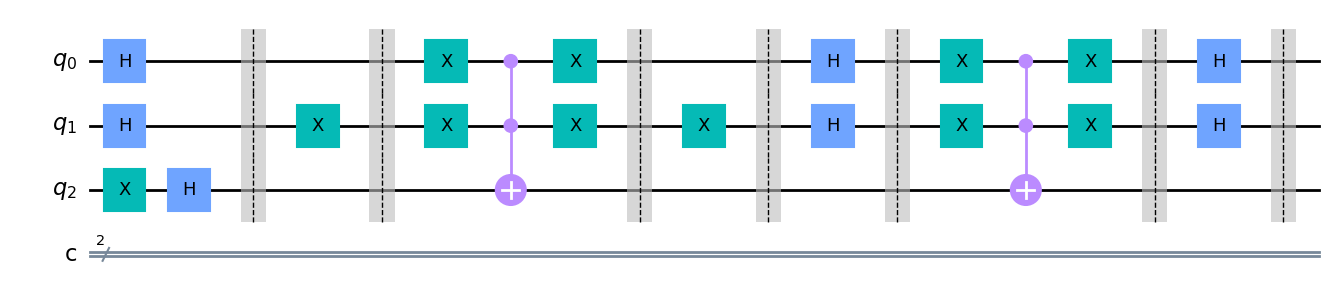

In [62]:
#solution

qc.h([0,1])
qc.barrier([0,1,2])

qc.x([0,1])
qc.ccx(0,1,2)
qc.x([0,1])
qc.barrier([0,1,2])
qc.h([0,1])
qc.barrier([0,1,2])

qc.draw('mpl')

이제 이 회로를 측정해 봅시다. qubit0과 qubit1만 측정합니다.

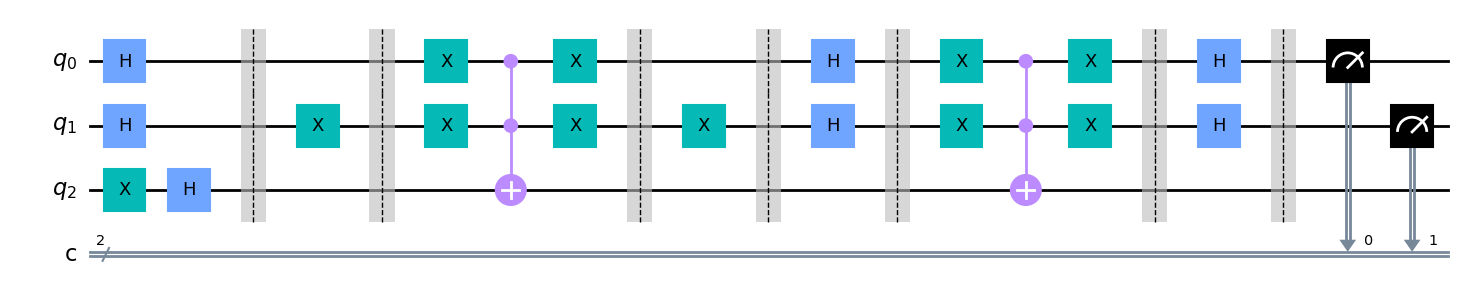

In [63]:

qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')

AerSimulator를 사용해서 100000번 측정한 후 count를 plot_histogram을 사용해 그려봅시다.

In [64]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

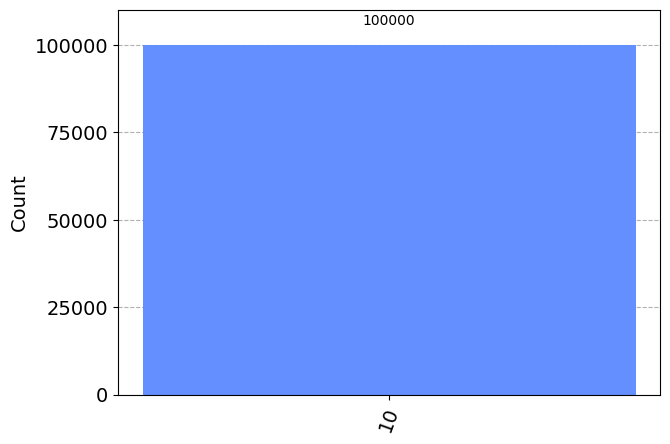

In [65]:
backend = AerSimulator()
counts = backend.run(qc, shots=100000).result().get_counts()
plot_histogram(counts)

## Grover Step by Step - use Phase Gate - Z

### State preparation

11의 상태만을 -로 바꾸는 Controlled-Z게이트를 사용해서도 Grover 알고리즘을 구현할 수 있습니다. 이 경우, 추가 비트는 필요하지 않습니다.


In [66]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

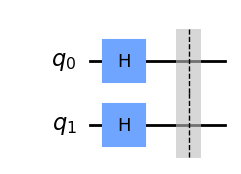

In [93]:
qc_p=QuantumCircuit(2)
qc_p.h([0,1])
qc_p.barrier([0,1])
qc_p.draw('mpl')

### Oracle 

이제 Q0, Q1에 Winning State에 -를 부여하는 Oracle회로를 작성합니다. 마찬가지로, 

$$U_f = I - 2|w\rangle\langle w |$$

이므로, 이를 회로로 구현하기 위해서 먼저, $A|0\rangle = |w\rangle$인 $A$ 유니터리를 생각해 보자. $|w\rangle = A|0\rangle$로 바꾸면,
$$AA^{\dagger} - 2A|0\rangle \langle 0 | A^{\dagger}$$

로 쓸수 있으므로 이 회로는 

$$A(I - |0\rangle\langle 0|)A^{\dagger}$$

의 형태로 작성될 수 있습니다. 이때 가운데 부분, $2|00\rangle\langle 00| - I$을 조금 자세히 살펴 보면,

$$\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1 \end{bmatrix} + \begin{bmatrix}-2 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1 \end{bmatrix} = 
\begin{bmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0  \\ 0 & 0 & 0 & 1 \end{bmatrix}$$

00에 - 값을 입히는 회로와 동등하므로 다음과 같이 회로를 구성할 수 있습니다.

In [68]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

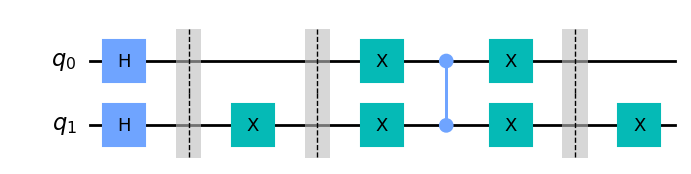

In [94]:
#A
qc_p.x(1)
qc_p.barrier([0,1])
qc_p.x([0,1])
qc_p.cz(0,1)
qc_p.x([0,1])
#A
qc_p.barrier([0,1])
qc_p.x(1)
qc_p.draw('mpl')

### Diffuser

Diffuser 회로는 위와 같이, 대신, Controlled Z 게이트를 사용해 구현합니다.

In [70]:
## your code here ##


# Youtube
IFrame(width="560", height="315", src="https://www.youtube.com/embed/PIljiNRTHqY", title="YouTube video player", frameborder="0" )

## your code here##

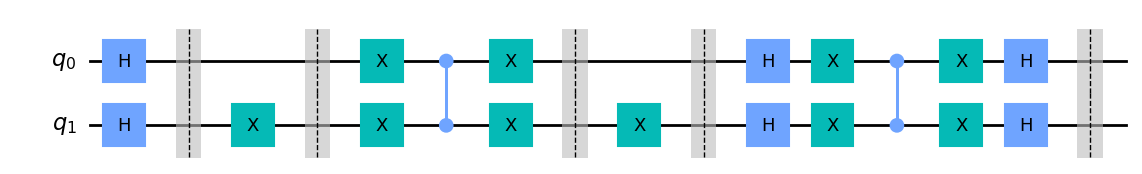

In [95]:
qc_p.barrier([0,1])
qc_p.h([0,1])
qc_p.x([0,1])
qc_p.cz(0,1)
qc_p.x([0,1])
qc_p.h([0,1])
qc_p.barrier([0,1])
qc_p.draw('mpl')

이체 회로를 측정하여 결과를 확인합니다.

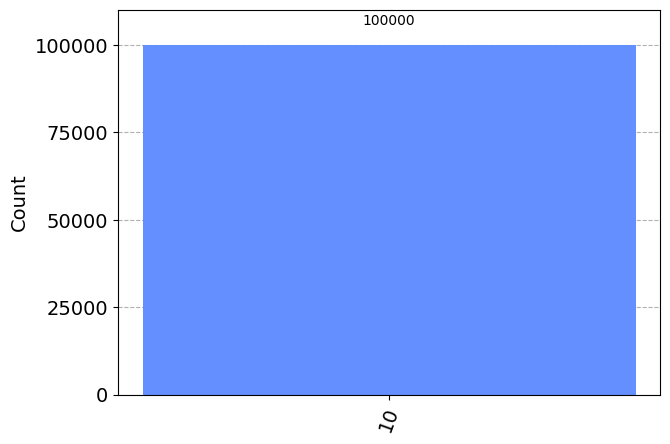

In [96]:
qc_p.measure_all()
backend = AerSimulator()
counts = backend.run(qc_p, shots=100000).result().get_counts()
plot_histogram(counts)

### RealBackend 실행 결과 비교.

두가지 회로 qc (Phase Kickback을 이용한 회로) 와 qc_p(phase gate)를 사용한, 두 가지 경우에 대해 리얼 백엔드 실행 결과를 비교해 봅시다. 우선 사용가능한 백엔드 목록을 불러와 봅시다. 

In [97]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit_ibm_provider import least_busy


service = QiskitRuntimeService(instance='ibm-q-yonsei/internal/qc-and-simulatio')

In [98]:
backend = least_busy(service.backends(filters=lambda x: x.configuration().n_qubits == 27 and
                                   not x.configuration().simulator and x.status().operational==True))
print(backend)

<IBMBackend('ibm_hanoi')>


In [102]:
backend=service.get_backend('ibm_hanoi')

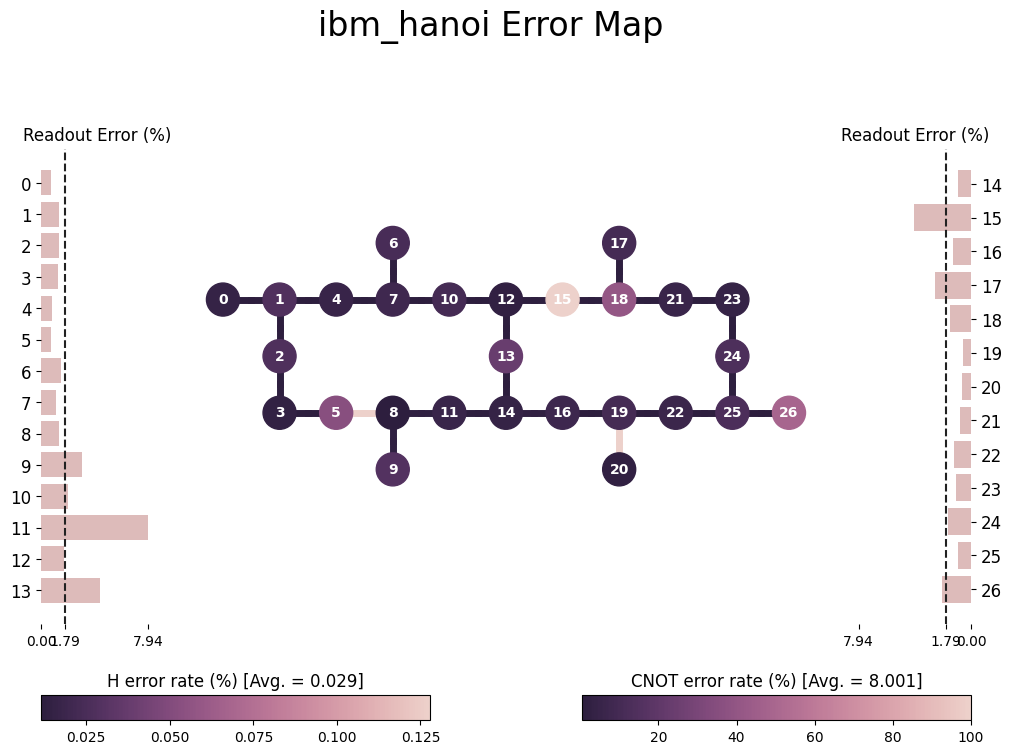

In [103]:
plot_error_map(backend)

real Backend에 실행하기 전, AerSampler에 백엔드의 특성을 입혀서 먼저 시뮬레이션 결과를 확인해 봅시다.

In [104]:
from qiskit_aer.noise import NoiseModel

coupling_map = backend.configuration().coupling_map
noise_model = NoiseModel.from_backend(backend)

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['measure', 'x', 'id', 'reset', 'cx', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), ('sx', (16,)), ('sx', (17,)), ('sx', (18,)), ('sx', (19,)), ('sx', (20,)

In [105]:
noisy_sampler = AerSampler(
    backend_options={
        "method": "density_matrix",
        "coupling_map": coupling_map,
        "noise_model": noise_model,
    }
)

In [106]:
sim_sampler_job = noisy_sampler.run(qc_p,shots=int(10e5),resilience_level=1)
sim_result = sim_sampler_job.result()

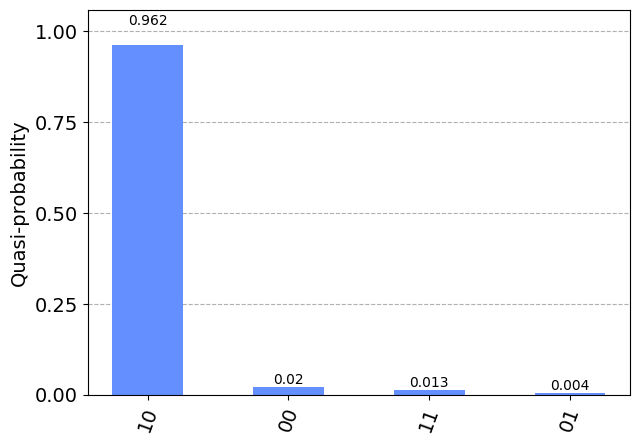

In [107]:
plot_distribution(sim_result.quasi_dists[0].binary_probabilities(),target_string='10', sort='hamming')

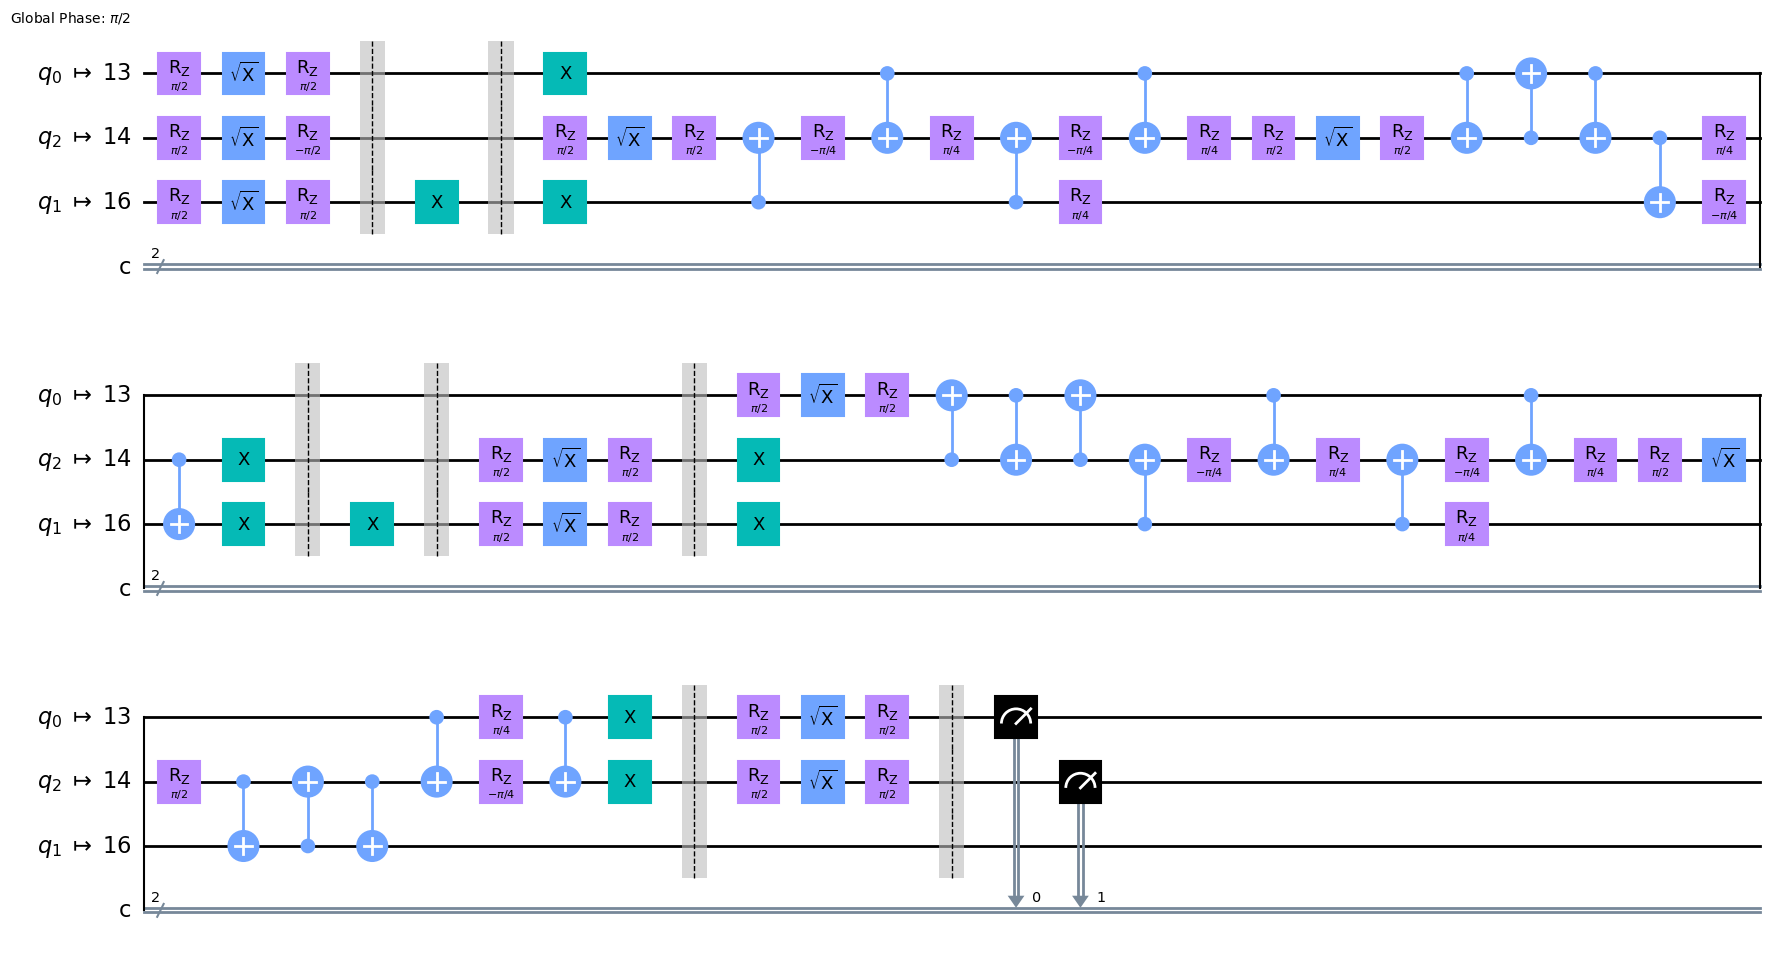

In [108]:
session = Session(backend=backend)
sampler = Sampler(session=session)
tr_qc = transpile(qc, backend)
tr_qc.draw('mpl', idle_wires=False)

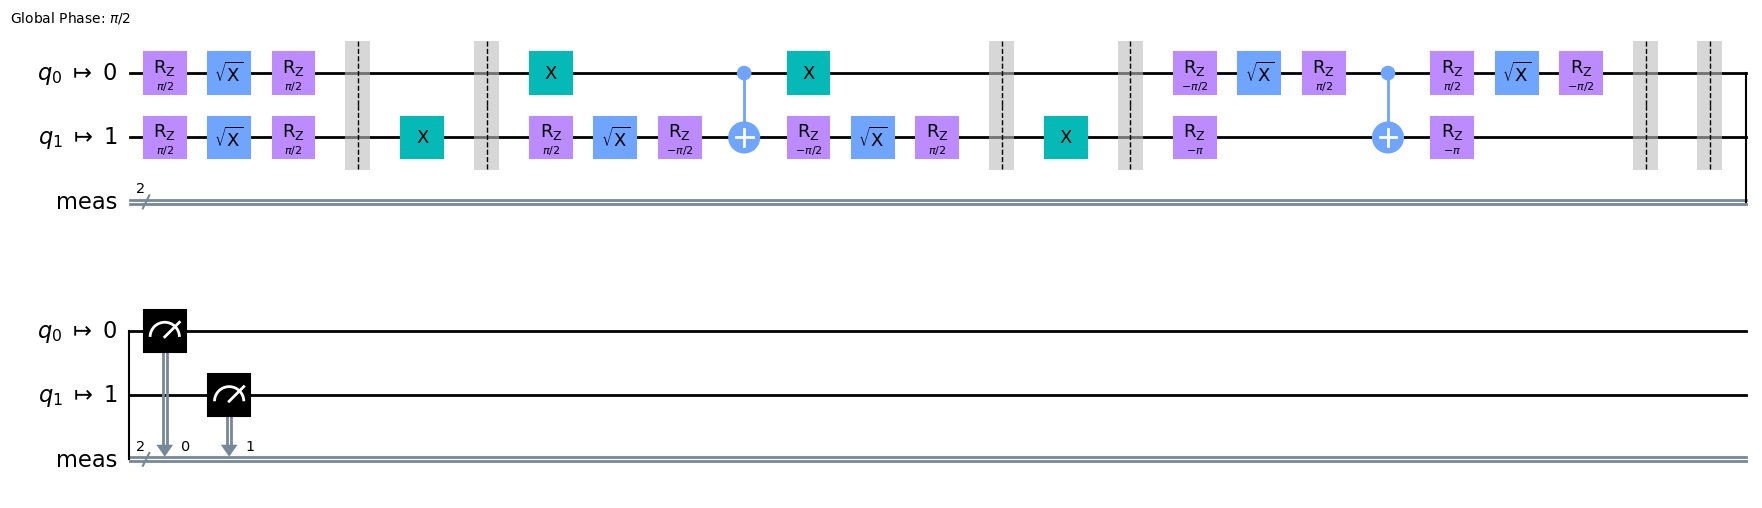

In [88]:
session = Session(backend=backend)
sampler = Sampler(session=session)
tr_qc_p = transpile(qc_p, backend)
tr_qc_p.draw('mpl', idle_wires=False)

In [109]:
sampler_job1 = sampler.run(tr_qc,shots=int(10e5),resilience_level=1)

In [27]:
sampler_job2 = sampler.run(tr_qc_p,shots=int(10e5),resilience_level=1)

In [90]:
display(sampler_job1.job_id())
display(sampler_job2.job_id())

'ch9fs2976h9ab2b88pd0'

'ch7l2cp6klhd7q9k5v4g'

In [110]:
sampler_job1 = service.runtime.job('ch9fquoo51arsoc7q41g') #auckland ch9fs2976h9ab2b88pd0
sampler_job2 = service.runtime.job('ch7l2cp6klhd7q9k5v4g')
display(sampler_job1.status())
display(sampler_job2.status())

<JobStatus.DONE: 'job has successfully run'>

<JobStatus.DONE: 'job has successfully run'>

In [111]:
result1 = sampler_job1.result()
result2 = sampler_job2.result()

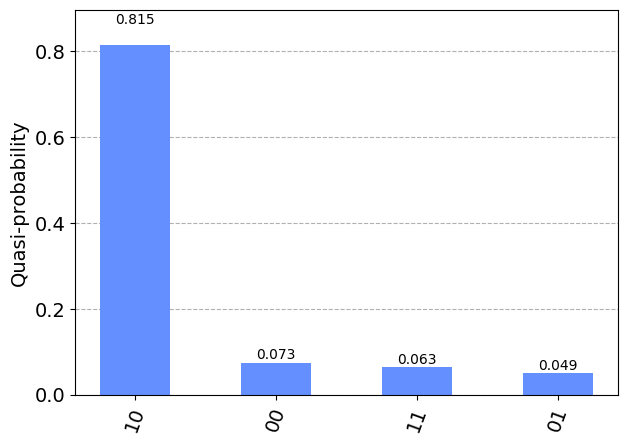

In [112]:
plot_distribution(result1.quasi_dists[0].binary_probabilities(),target_string='10', sort='hamming')

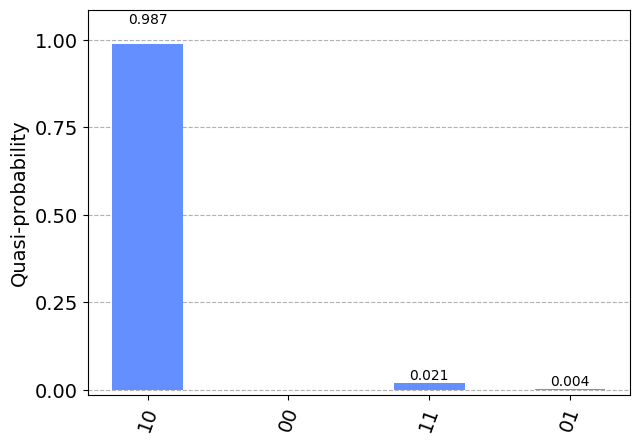

In [113]:
plot_distribution(result2.quasi_dists[0].binary_probabilities(),target_string='10', sort='hamming')

## 실습

2x2 "Lights Out" Puzzle을 풀어봅시다! 


라이츠 아웃은 유명한 퍼즐 게임입니다. 플레이어에게는 격자 모양의 불이 켜지는 공간이 주어집니다.이 중 몇 개는 불이 켜져 있고, 몇 개는 점등 되어 있습니다.이 문제의 목적은 랜덤하게 켜져있는 격자안에 불을 모두 끄는 것입니다. 각각의 라이트에는 스위치가 장착되어 있어 이를 누르면 점등/소등시킬 수 있습니다. 하지만 이 라이트는 조금 특별해서 라이트의 스위치를 누르면 양옆과 위아래의 라이트도 같이 반전됩니다 (켜져있다면 꺼지고, 꺼져있다면 켜집니다)

### 퍼즐 예제

아래 그림은 3x3 라이츠 아웃 퍼즐의 예시입니다.각 라이트에는 0부터 8까지의 라벨이 붙어 있습니다.이진 목록을 사용하여 등불의 상태를 나타낼 수 있습니다.'1'은 켜져있는 라이트를 나타내고, '0'은 꺼져있는 라이트를 나타냅니다.아래 리스트('lights')는 이 예제의 등불의 초기 상태를 나타내고 있습니다.(라이트3,5,6,7이 켜져있고 나머지는 오프입니다)

<img src='img/lights_out_rule.png' alt="Alternative text" width=800/>


```python
lights = [0, 0, 0, 1, 0, 1, 1, 1, 0]
```

예제는, 그림에 나타난 것처럼, 0, 3, 4의 스위치를 조작하는 것으로 해결할 수 있습니다.조금 플레이를 하다 보면 곧 이 퍼즐 게임의 **두 가지 중요한 특성**을 알게 될 것입니다.


1. 같은 스위치를 두번이상 누를 필요는 없습니다.
2. 스위치를 누르는 순서는 중요하지 않습니다.

따라서 초기 상태와 마찬가지로 이진 목록으로 퍼즐의 해를 표현할 수 있습니다. 다만, 여기에서는 `0`과 `1`의 의미가 조금 달라서 `1`은 스위치를 조작하는 것을 나타내고 `0`은 스위치를 그대로 두는 것을 나타냅니다.


```python
solution = [1, 0, 0, 1, 1, 0, 0, 0, 0]
```

### 문제!

다음의 퍼즐을 풀어보세요!

<img src='img/problem.png' alt="Alternative text" width=200/>

lights = [0, 0, 1, 0]

Step1: 보드를 준비합시다


In [114]:
lights = [0, 0, 1, 0]


그 다음, 보드를 양자 회로에 작성하는 코드를 만들어 봅시다.

In [115]:
def map_board(lights, qc, qr):
    j = 0
    for i in lights:
        if i==1:
            qc.x(qr[j])
            j+=1
        else:
            j+=1

<img src='img/2x2.jpeg' alt="Alternative text" width=800/>

이 문제를 해결하기 위한 회로는 위와 같이 구성됩니다.

In [120]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
tile = QuantumRegister(4)
flip = QuantumRegister(4)
oracle = QuantumRegister(1)
result = ClassicalRegister(4)
#9 qubit + 4bit
qc = QuantumCircuit(oracle, tile, flip, result)

정답을 찾기 위한 조건을 오라클에 넣기 전, 몇가지 초기화 단계가 필요합니다.

1. 문제의 보드 정보를 tile에 기록합니다.
2. flip 레지스터를 중첩 상태로 준비합니다. flip 양자레지스터의 중첩상태가 바로 탐색대상이 됩니다.
3. 오라클 레지스터를 |-> 상태로 만듭니다. 

In [121]:
def initialize():
    map_board(lights, qc, tile)

    qc.h(flip[:])
    
    qc.x(oracle[0])
    qc.h(oracle[0])

이제 버튼을 누르는 기능을 구현해 봅시다. 동작은 다음과 같습니다.

<img src='img/flip_tile.png' alt="Alternative text" width=600/>
이 동작을 양자회로로 구현하면 다음과 같습니다.

<img src='img/flip_tile_circuit.png' alt="Alternative text" width=600/>

이 회로를 구현하는 함수를 만들어 봅시다.

In [40]:
# Subroutine for oracle
# Calculate what the light state will be after pressing each solution candidate. 
def flip_tile(qc,flip,tile):
    qc.cx(flip[0], tile[0])
    qc.cx(flip[0], tile[1])
    qc.cx(flip[0], tile[2])
    qc.cx(flip[1], tile[0])
    qc.cx(flip[1], tile[1])
    qc.cx(flip[1], tile[3])
    qc.cx(flip[2], tile[0])
    qc.cx(flip[2], tile[2])
    qc.cx(flip[2], tile[3])
    qc.cx(flip[3], tile[1])
    qc.cx(flip[3], tile[2])
    qc.cx(flip[3], tile[3])

모든 블럭의 불이 꺼졌는지 체크하는 함수를 만들어 봅시다.

In [122]:
def all_zero(qc, tile):
    qc.x(tile[0:4])
    qc.mct(tile[0:4], oracle[0])
    qc.x(tile[0:4])

이제 전체 회로를 작성해 봅시다. 전체 가능한 해답의 수가 $2^4$이므로, Oracle고 Diffusion은 $\frac{\pi}{4} \sqrt{2^4} - \frac{1}{2} \risingdotseq 2.641$, 약 3회 반복합시다. 

In [123]:
# create the circuit
initialize()
qc.barrier()
# the number of iteration is 3
for i in range(3):
    # oracle
    flip_tile(qc,flip,tile)
    
    qc.barrier()
    
    all_zero(qc, tile)
    
    qc.barrier()
    
    # U^dagger of flip_tile function is flip_tile itself.
    flip_tile(qc,flip,tile)
    
    # diffusion
    qc.h(flip)
    qc.x(flip)
    qc.h(flip[3])
    qc.mct(flip[0:3], flip[3])
    qc.h(flip[3])
    qc.x(flip)
    qc.h(flip)
    qc.barrier()

# Uncompute
qc.h(oracle[0])
qc.x(oracle[0])
qc.barrier()

# Measurement
qc.measure(flip,result)
qc.barrier()
# Make the Out put order the same as the input.
qc = qc.reverse_bits() 

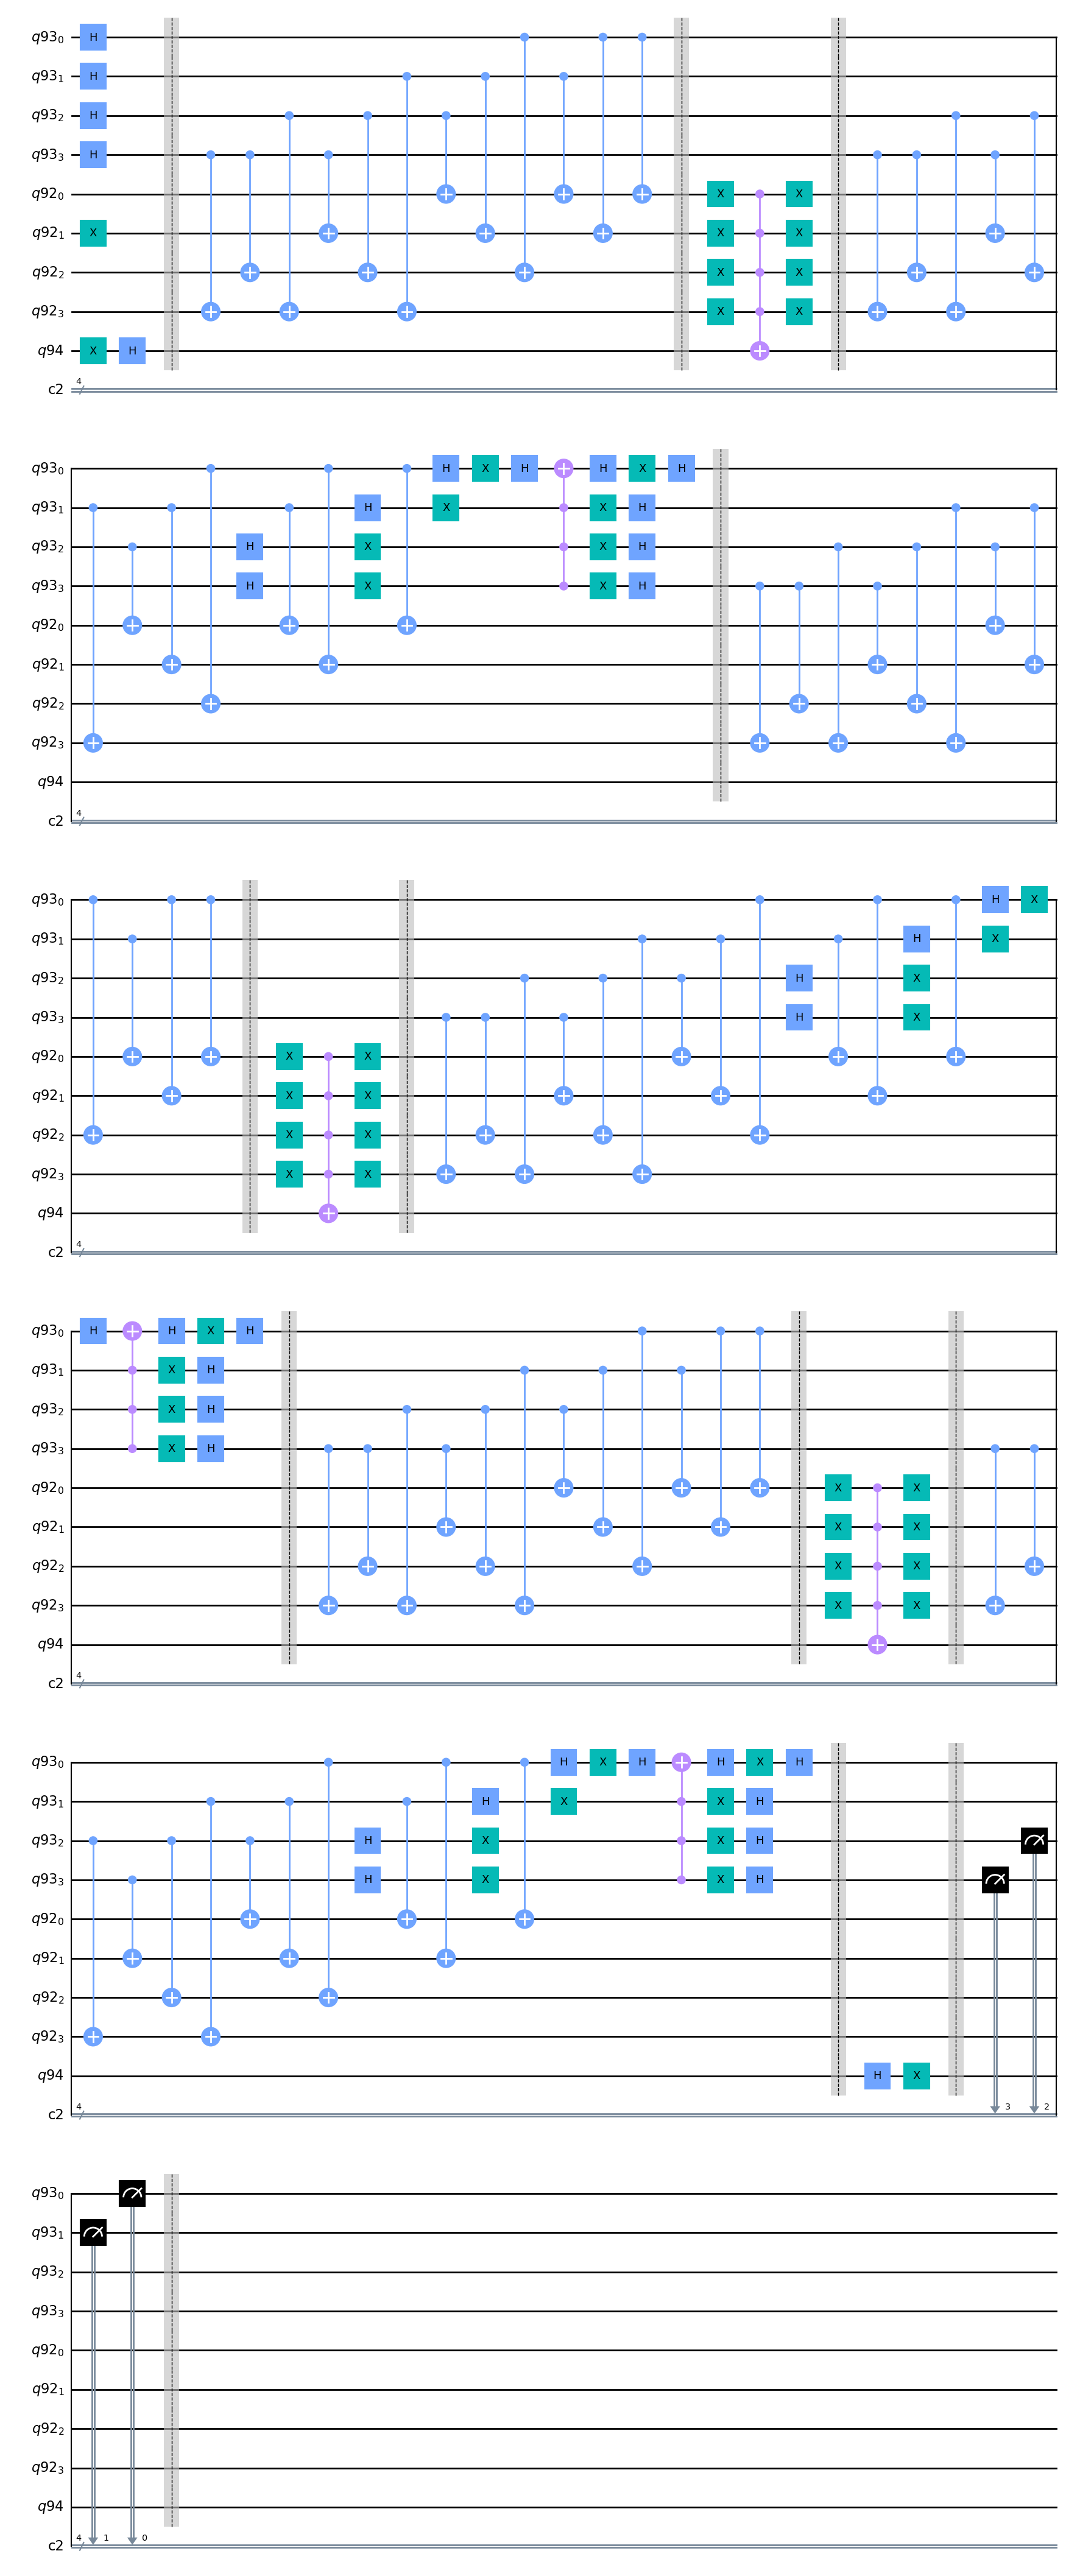

In [124]:
qc.draw(output='mpl')


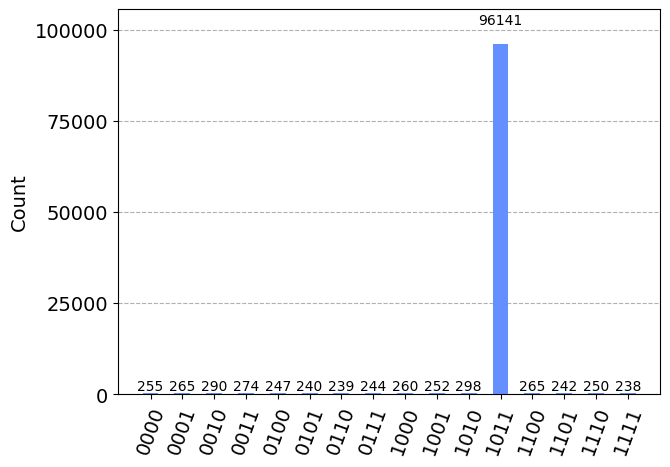

In [125]:
backend = AerSimulator()
counts = backend.run(qc, shots=100000).result().get_counts()
plot_histogram(counts)

In [45]:
#IBMProvider.save_account("Your_Token", overwrite=True)
#provider = IBMProvider()

#수업을 위해 추가된 허브와 그룹, 프로젝트를 프로바이더에 설정
provider = IBMProvider(instance="ibm-q-yonsei/internal/qc-and-simulatio")

In [126]:
from qiskit_ibm_provider import least_busy

real_backend = least_busy(provider.backends())
real_backend

<IBMBackend('ibm_auckland')>

In [117]:
qc_tr = transpile(qc, real_backend)
job1 = real_backend.run(qc_tr, shots = 100000)

In [118]:
job1.job_id()

'ch9hspgo51arsoc8o6l0'

In [119]:
from qiskit.tools.monitor import job_monitor
job0 = provider.retrieve_job('ch9hspgo51arsoc8o6l0')
job_monitor(job0)

Job Status: job incurred error     


In [ ]:
counts = job0.result().get_counts()
plot_histogram(counts)